In [275]:
import pandas as pd
df_o = pd.read_csv('../data/preprocessed_df.csv')

# This is out for the v1
df= df_o.drop(columns= ['interest_lifestyle', 'interest_health', 	'interest_creativity'	,'interest_education_culture',
                    'interest_entertainment','interest_social'])

In [276]:
df.head(3)

,female,gender_not_specified,male,not_cis,asexual,bi/pan/demi_sexual/queer,heterosexual,homosexual,income,romantic_relationship_intent,education_level_grouped,location_density,air_zodiac_sign,earth_zodiac_sign,fire_zodiac_sign,water_zodiac_sign,age,bio_length,likes_received,emoji_usage_rate,message_sent_count
0,0,1,0,0,0,0,0,1,2,0,1,2,0,1,0,0,56,44,173,0.36,75
1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,40,301,107,0.42,35
2,0,0,0,1,0,1,0,0,0,2,2,1,0,0,1,0,30,309,91,0.41,33


In [277]:
features_to_scale = ['income', 'romantic_relationship_intent', 'education_level_grouped','location_density',
                     'age', 'bio_length',	'likes_received',	'emoji_usage_rate',	'message_sent_count']
other_features = [col for col in df.columns if col not in features_to_scale]

In [278]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features_to_scale])

In [279]:
from sklearn.cluster import KMeans
import numpy as np

X = np.hstack((X_scaled, df[other_features].values))

rg = range(2, 15)
within_cluster_distance = []

for k in rg:
    k_means = KMeans(n_clusters= k, random_state=42)
    k_means.fit(X)
    within_cluster_distance.append(np.sqrt(k_means.inertia_))

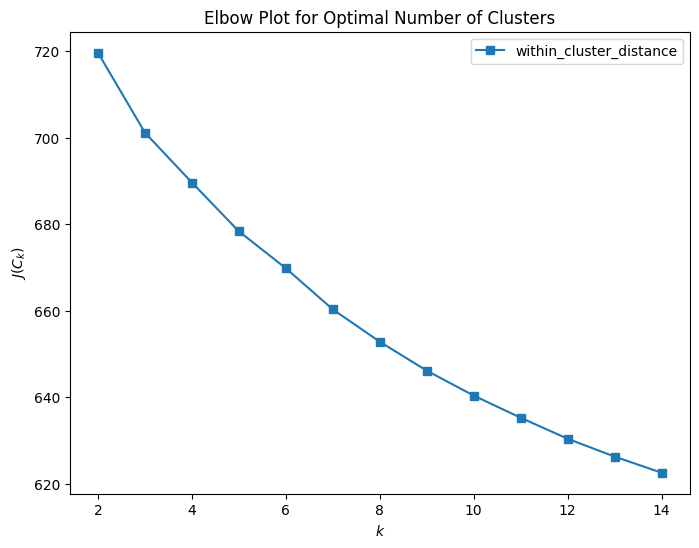

In [280]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(rg, within_cluster_distance, marker='s', label='within_cluster_distance')

plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.legend()

plt.show()

In [281]:
# According to the previous image, I selected 7 as the elbow for k 
kmeans = KMeans(n_clusters= 7, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

print(df['cluster'].value_counts())

cluster
5    7506
6    7377
3    7220
4    7197
0    7146
1    7124
2    6430
Name: count, dtype: int64


Analysing the clusters grouping

In [283]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)  

In [284]:
clusters_means = df.groupby('cluster').mean()
clusters_means

,female,gender_not_specified,male,not_cis,asexual,bi/pan/demi_sexual/queer,heterosexual,homosexual,income,romantic_relationship_intent,education_level_grouped,location_density,air_zodiac_sign,earth_zodiac_sign,fire_zodiac_sign,water_zodiac_sign,age,bio_length,likes_received,emoji_usage_rate,message_sent_count
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.165687,0.166387,0.167926,0.500000,0.126504,0.492443,0.125385,0.255668,1.418416,0.729359,1.034005,1.535824,0.250630,0.257487,0.250630,0.241254,38.123006,111.730758,57.703051,0.257575,49.663308
1,0.174902,0.173638,0.163812,0.487647,0.124228,0.501965,0.128018,0.245789,0.780039,0.875070,1.161567,0.495649,0.250983,0.242420,0.250983,0.255615,37.296603,327.142757,55.607805,0.246099,22.613279
2,0.174028,0.164541,0.167030,0.494401,0.128460,0.505910,0.121617,0.244012,0.961897,0.791291,1.088802,0.960187,0.252877,0.246034,0.248523,0.252566,38.489736,248.748212,105.100933,0.566370,50.988958
3,0.166759,0.161357,0.166343,0.505540,0.126316,0.498476,0.119391,0.255817,1.455540,0.955263,1.062188,1.596953,0.250970,0.251662,0.239058,0.258310,39.847645,391.415789,93.499446,0.248735,66.426593
4,0.158121,0.167431,0.169654,0.504794,0.133250,0.485341,0.128109,0.253300,0.448798,0.793108,1.306239,0.416285,0.254689,0.253856,0.245519,0.245936,39.325274,226.938447,83.948729,0.238679,78.544116
5,0.169198,0.165601,0.161204,0.503997,0.117639,0.502798,0.135492,0.244071,1.523181,0.873568,0.809219,0.310951,0.249534,0.255929,0.251266,0.243272,38.266587,217.773115,149.162270,0.239940,45.386491
6,0.165786,0.167819,0.160228,0.506168,0.119967,0.511048,0.126745,0.242239,0.439745,0.834350,1.321675,1.643080,0.255524,0.244002,0.255795,0.244679,38.000000,228.598753,148.183543,0.238585,37.168768


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13492\2742713886.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  interest_per_cluster = df.groupby('cluster').apply(lambda x: df_o.loc[x.index, interest_cols].mean())


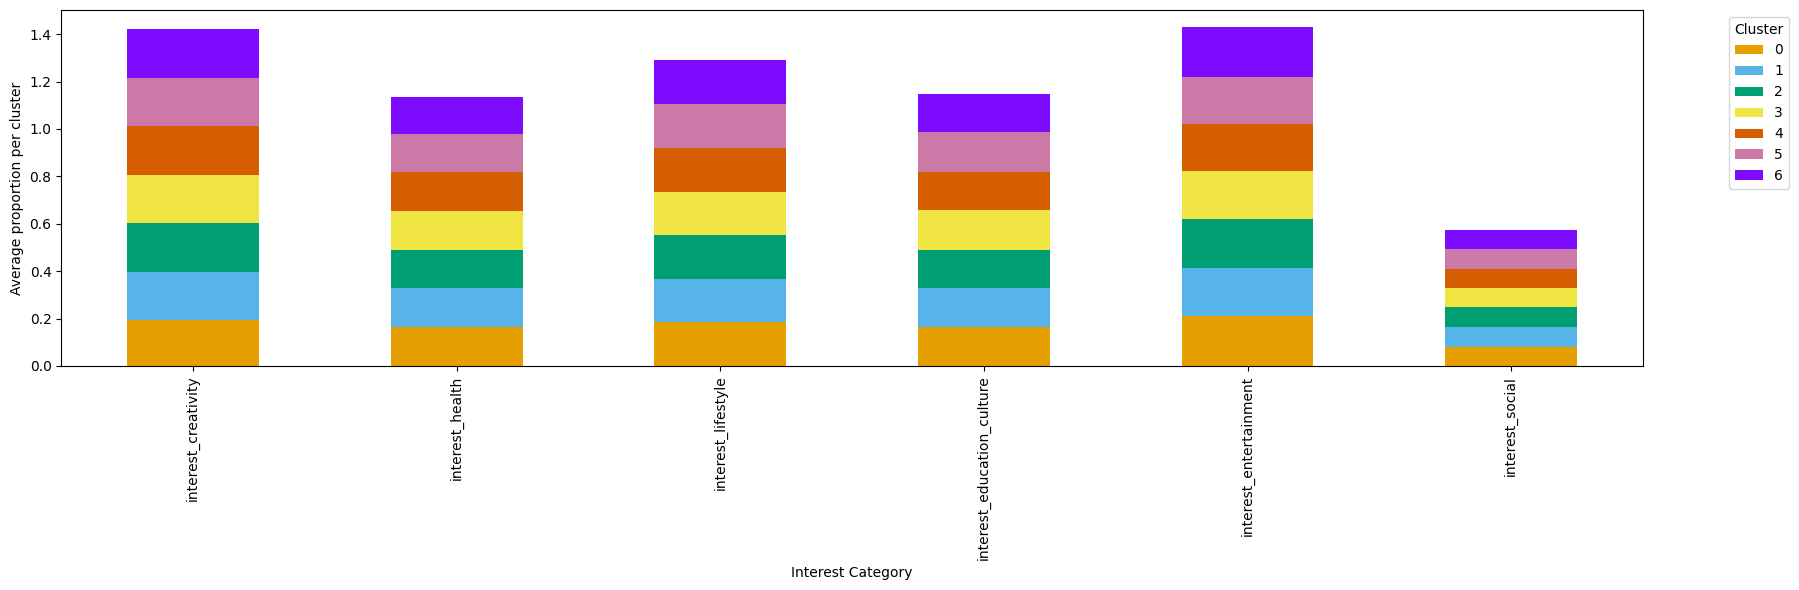

In [287]:
interest_cols = ['interest_creativity',	'interest_health',	'interest_lifestyle',	'interest_education_culture',
                    'interest_entertainment', 'interest_social']
df_o = df_o.loc[df.index]

interest_per_cluster = df.groupby('cluster').apply(lambda x: df_o.loc[x.index, interest_cols].mean())
percent = interest_per_cluster.T


colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#D55E00', '#CC79A7', "#7D0CFF"]

percent.plot(kind='bar', stacked=True, figsize=(18, 6), color=colors)
plt.ylabel('Average proportion per cluster')
plt.xlabel('Interest Category')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()